In [1]:
import numpy as np
from geometricus_deep_learning import utils, embedder
import matplotlib.pyplot as plt
import torch
from glob import glob
import pprint

%load_ext autoreload
%autoreload 2


In [2]:
import dataclasses

In [3]:
# First we define the type of moment invariants to be used in geometricus. Here I defined two, one is using 
# kmer splits and the other is using radius method to extract coordinates. Moment types for both include all
# implemented moment invariant types (16 of them)

invariant_types = [embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=30, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=15, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.RADIUS, 
                                          k=10, moment_types=None)]

In [4]:
# grab the pdb ids in 35%-similarity dataset from CATH.

pdb_ids = {x.split("/")[-1] for x in glob("data/cath/*")}
pdb_ids

{'2wqtA00',
 '1sr2A00',
 '2xzmW04',
 '1vqrA00',
 '3rwxA02',
 '5ee2A00',
 '1vwxI01',
 '2yjlA00',
 '3uj4A02',
 '5yluA03',
 '1eg3A02',
 '3j7aO00',
 '6akqA02',
 '5e10A01',
 '3zizA00',
 '3e6zX01',
 '2qxlB05',
 '3nnkA01',
 '1mgvA01',
 '3k9iA01',
 '5dmsA02',
 '3hl6A02',
 '1hxaA02',
 '4mo4A02',
 '6r1eA00',
 '3rc3A05',
 '3bbaA00',
 '3vk6A02',
 '2gttC01',
 '2k4hA01',
 '4f0lB01',
 '3gglA00',
 '2a5hA02',
 '5awwY00',
 '3r05A04',
 '4rwxC01',
 '3bdrA00',
 '1zmbA02',
 '2kq8A01',
 '4mpgA02',
 '3i0mA03',
 '2o3iA01',
 '4xk8d00',
 '1jcmP00',
 '2lhfA00',
 '1y79101',
 '1gnlA01',
 '3w7tA04',
 '4ze8A02',
 '1zmeC02',
 '2kuaA01',
 '3offA00',
 '3kphA02',
 '5gkxA00',
 '2q8vB00',
 '3ihpB05',
 '4kdrA00',
 '1pdnC02',
 '153lA00',
 '3abzA03',
 '3h0gI01',
 '1jbjA01',
 '4jp0A01',
 '1d4vA03',
 '1qrjA01',
 '5n5fA00',
 '1l6kA00',
 '2ehgA00',
 '2qhkA00',
 '4nkbB02',
 '3pjxA01',
 '1crkA02',
 '3llxA02',
 '1y4cA03',
 '2qsfA04',
 '3llcA00',
 '1v33A01',
 '3ip1A01',
 '4ernA00',
 '6c2oA01',
 '1xouB00',
 '2i6eA01',
 '1ka1A02',
 '3o

In [5]:
# Extract all the class data regarding CATH and map them to the domain ids (same as the above pdb ids).
# we use the pdb_ids to filter out unwanted mappings.

domain_info = utils.DomainInfo.from_domainlist_file("./data/cath-domain-list-S100.txt").domains
cath_mapping = {k: f"{v.c_class}-{v.architecture}-{v.topology}" for k, v in domain_info.items() if k in pdb_ids}
keys, counts = np.unique(list(cath_mapping.values()), return_counts=True)
least_allowed_class_count = 20
keys_to_use = {x for x in keys[np.where(counts >= least_allowed_class_count)[0]]}
cath_mapping = {k: v for k, v in cath_mapping.items() if v in keys_to_use}
print(f'number of classes (more than {least_allowed_class_count} domains): {len(keys_to_use)}\nnumber of domains: {len(cath_mapping)}')

number of classes (more than 20 domains): 116
number of domains: 10971


In [6]:
# !mkdir ./models/debug_model

In [7]:
# Create and train the model.. this takes some time

emb = embedder.GeometricusGraphEmbedder.fit("./data/cath/", invariant_types, cath_mapping,
                                            epochs=2_000, file_output_path="./models/cath_model/",
                                            learning_rate=0.001, number_of_batches=512,
                                            hidden_channels=50)

Initial: Train Acc: 0.0033, Test Acc: 0.0032
Epoch: 010, Train Acc: 0.2008, Test Acc: 0.1994
Epoch: 020, Train Acc: 0.2737, Test Acc: 0.2629
Epoch: 030, Train Acc: 0.3043, Test Acc: 0.2957
Epoch: 040, Train Acc: 0.3408, Test Acc: 0.3311
Epoch: 050, Train Acc: 0.3654, Test Acc: 0.3455
Epoch: 060, Train Acc: 0.3837, Test Acc: 0.3622
Epoch: 070, Train Acc: 0.3979, Test Acc: 0.3733
Epoch: 080, Train Acc: 0.4104, Test Acc: 0.3843
Epoch: 090, Train Acc: 0.4220, Test Acc: 0.3928
Epoch: 100, Train Acc: 0.4308, Test Acc: 0.4007
Epoch: 110, Train Acc: 0.4408, Test Acc: 0.4053
Epoch: 120, Train Acc: 0.4495, Test Acc: 0.4137
Epoch: 130, Train Acc: 0.4572, Test Acc: 0.4212
Epoch: 140, Train Acc: 0.4658, Test Acc: 0.4283
Epoch: 150, Train Acc: 0.4696, Test Acc: 0.4300
Epoch: 160, Train Acc: 0.4756, Test Acc: 0.4342
Epoch: 170, Train Acc: 0.4837, Test Acc: 0.4399
Epoch: 180, Train Acc: 0.4862, Test Acc: 0.4407
Epoch: 190, Train Acc: 0.4923, Test Acc: 0.4464
Epoch: 200, Train Acc: 0.4981, Test Acc: 0.

Epoch: 1700, Train Acc: 0.7255, Test Acc: 0.6014
Epoch: 1710, Train Acc: 0.7274, Test Acc: 0.6010
Epoch: 1720, Train Acc: 0.7288, Test Acc: 0.6016
Epoch: 1730, Train Acc: 0.7290, Test Acc: 0.6006
Epoch: 1740, Train Acc: 0.7274, Test Acc: 0.6050
Epoch: 1750, Train Acc: 0.7262, Test Acc: 0.6038
Epoch: 1760, Train Acc: 0.7285, Test Acc: 0.6068
Epoch: 1770, Train Acc: 0.7302, Test Acc: 0.6055
Epoch: 1780, Train Acc: 0.7311, Test Acc: 0.6028
Epoch: 1790, Train Acc: 0.7259, Test Acc: 0.5994
Epoch: 1800, Train Acc: 0.7333, Test Acc: 0.6057
Epoch: 1810, Train Acc: 0.7296, Test Acc: 0.6004
Epoch: 1820, Train Acc: 0.7337, Test Acc: 0.6077
Epoch: 1830, Train Acc: 0.7348, Test Acc: 0.6074
Epoch: 1840, Train Acc: 0.7340, Test Acc: 0.6080
Epoch: 1850, Train Acc: 0.7350, Test Acc: 0.6052
Epoch: 1860, Train Acc: 0.7360, Test Acc: 0.6053
Epoch: 1870, Train Acc: 0.7321, Test Acc: 0.6035
Epoch: 1880, Train Acc: 0.7373, Test Acc: 0.6058
Epoch: 1890, Train Acc: 0.7380, Test Acc: 0.6068
Epoch: 1900, Train A

In [12]:
# emb = embedder.GeometricusGraphEmbedder.from_model_meta_file("./models/cath_model/meta.pkl")

In [9]:
torch.cuda.empty_cache() # this forces garbage collection

In [7]:
# Some info on training data

dataclasses.asdict(emb.model_meta)

{'model_path': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/model.pth',
 'umap_transformer_path': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/umap.pkl',
 'pdb_folder': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/data/cath',
 'self_path': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/meta.pkl',
 'classes_to_ids': None,
 'invariant_types': [{'type': <SplitType.KMER: 1>,
   'k': 30,
   'moment_types': None},
  {'type': <SplitType.RADIUS: 2>, 'k': 10, 'moment_types': None}],
 'train_acc': 0.7717299578059071,
 'test_acc': 0.6316085489313836,
 'original_invariants_file': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/invariants.pkl'}

{'1BOZ_A_4.pdb': 41,
 '1BZF_A_3.pdb': 41,
 '1TSL_A_5.pdb': 41,
 '2LE9_B_9.pdb': 1,
 '2M0R_A_19.pdb': 1,
 '2ZJR_K_20.pdb': 41,
 '3D0Y_B_3.pdb': 12,
 '3F0V_X_2.pdb': 41,
 '3F8Z_A_4.pdb': 41,
 '3JCM_H_856.pdb': 41,
 '3QLZ_A_8.pdb': 41,
 '3S7N_A_153.pdb': 21,
 '4IOA_K_20.pdb': 41,
 '4PTH_A_1.pdb': 41,
 '4UFY_A_963.pdb': 41,
 '5ADT_A_963.pdb': 41,
 '5AL1_A_963.pdb': 41,
 '5IST_X_2.pdb': 41,
 '5KPO_A_808.pdb': 22,
 '5LLY_A_147.pdb': 18}


(<matplotlib.image.AxesImage at 0x7efd2d927460>, None)

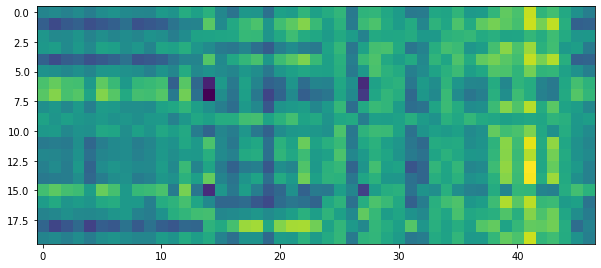

In [8]:
# Here we can classify some pdbs and visualize embeddings
plt.figure(figsize=(10,5))
test_embedding, ids, classification = emb.pdbs_to_raw_embedding("data/some_pfam_pdbs/")
plt.imshow(test_embedding[:20]), pprint.pprint({ids[i]: classification[i] for i in range(len(ids[:20]))})

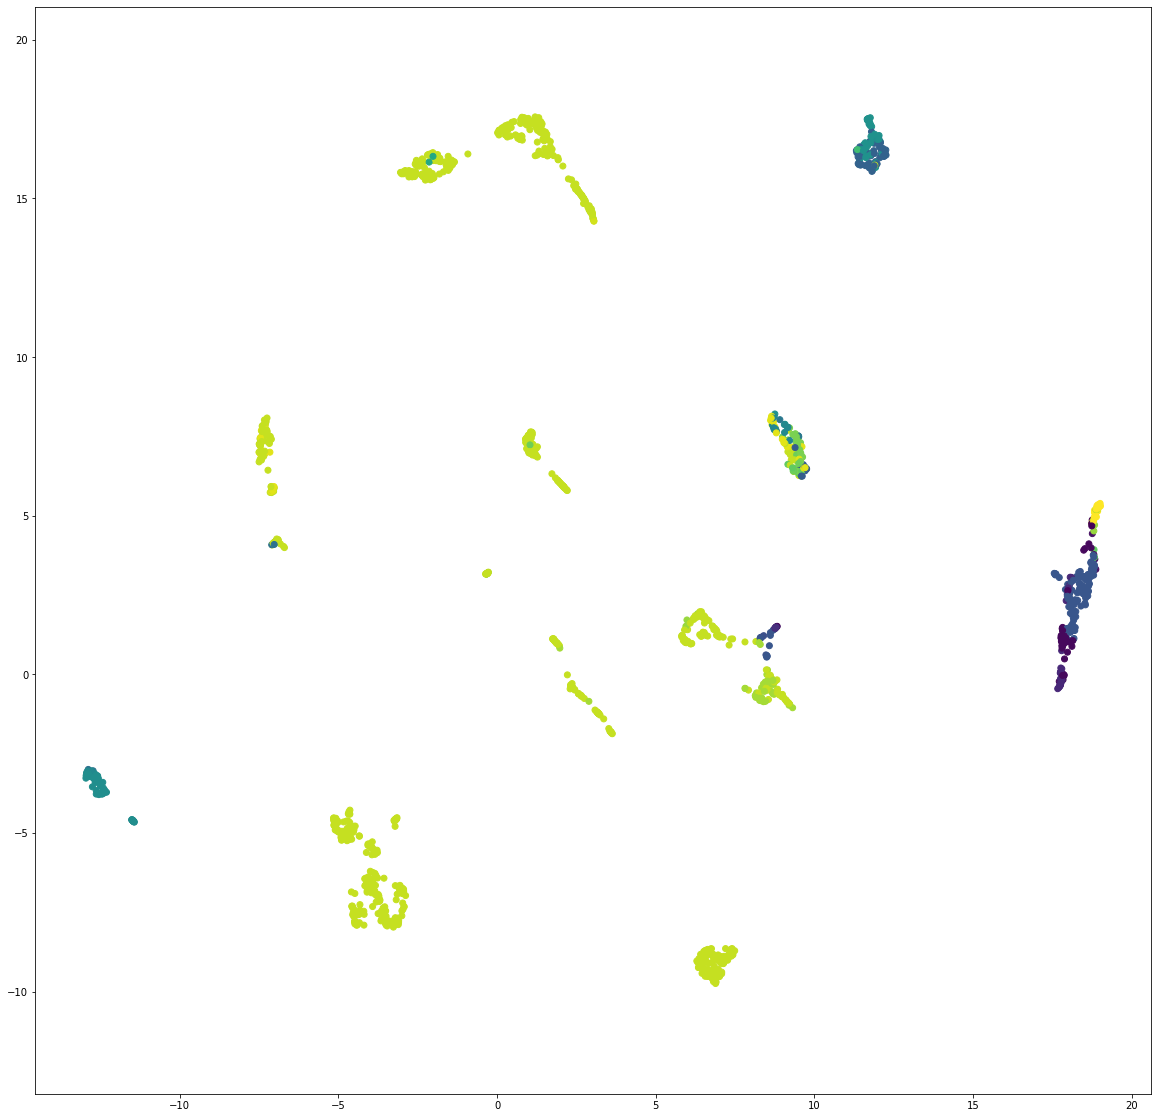

In [10]:
# we could also plot the embeddings coloured by predicted classes
from umap import UMAP

umap_embedding = UMAP(n_components=2).fit_transform(test_embedding)
plt.figure(figsize=(20,20))
plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=classification)
plt.gca().set_aspect('equal', 'datalim')